In [89]:
# Importing Modules required to execute this piece of code
import mxnet as mx
from mxnet import gluon, nd, autograd
mx.random.seed(1)
import matplotlib.pyplot as plt
import numpy as np

In [90]:
from mxnet.gluon.loss import CosineEmbeddingLoss

In [91]:
from mxnet import gluon, nd, autograd

In [92]:
# defining context and other input features and stuff
num_examples = 10000
num_features = 4
epochs = 10
num_outputs = 4
model_ctx = mx.cpu()
data_ctx = mx.cpu()

In [93]:
# Random sampling for X 
X = nd.random.uniform(shape=(num_examples,num_features), ctx = data_ctx)
target_vector = nd.random.poisson(lam =3,shape=(num_examples,num_features))

In [94]:
label = mx.nd.sign(mx.nd.random.randn(X.shape[0]))

In [95]:
batch_size = 20

In [96]:
# Generate the training set usin ArrayDataSet
training_set = gluon.data.DataLoader(gluon.data.ArrayDataset(X,target_vector,label), shuffle=True, batch_size = batch_size )

In [97]:
net = gluon.nn.Sequential()
#Add a sequence of layers.
net.add(
    gluon.nn.Dense(4, activation='tanh'),
    gluon.nn.Dense(3, activation='relu'),
    gluon.nn.Dense(num_outputs),
    
)

net

Sequential(
  (0): Dense(None -> 4, Activation(tanh))
  (1): Dense(None -> 3, Activation(relu))
  (2): Dense(None -> 4, linear)
)

In [98]:
net.collect_params().initialize(mx.init.Normal(sigma=0.1), ctx=mx.cpu())

In [99]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.05})

In [100]:
cosine_loss = CosineEmbeddingLoss()

In [101]:
epochs = 50
loss_sequence = []
loss_seq = []
niter = 0
epochslist = []
num_batches = num_examples / batch_size
smoothing_constant = 0.5
moving_loss = 0
ops = []

for e in range(epochs):
    cumulative_loss = 0
    # inner loop
    for i, (data, target, batch_label) in enumerate(training_set):

        with autograd.record():
            output = net(data)
            loss =  cosine_loss(output, target, batch_label)
        loss.backward()
        trainer.step(batch_size)
        niter +=1
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss

        # correct the bias from the moving averages
        est_loss = moving_loss/(1-(1-smoothing_constant)**niter)
        loss_seq.append(est_loss)
        cumulative_loss += nd.mean(loss).asscalar()
    ops.append(output.mean())
    if e % 10 == 0:    
        print("Epoch %s, loss: %s" % (e, cumulative_loss / num_examples))
    #print(output.mean())
    loss_sequence.append(cumulative_loss / num_examples)
    epochslist.append(e)

Epoch 0, loss: nan
Epoch 10, loss: nan
Epoch 20, loss: nan
Epoch 30, loss: nan
Epoch 40, loss: nan


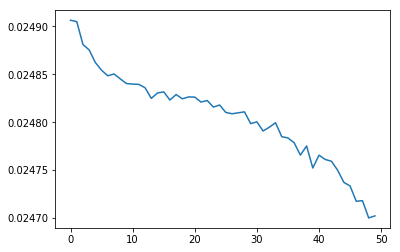

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(epochslist,loss_sequence)